<font color='red'>TOTAL: 89/100</font>
<br>
<font color='green'>COMMENT: -</font>

# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [29]:
from __future__ import print_function, division
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn import linear_model, decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [31]:
print("X: ")
print(X)
print("Y: ")
print(y)

X: 
      abc   ability      able   ac    accept  access  according  acquired  \
0     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
1     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
2     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
3     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
4     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
5     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
6     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
7     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
8     0.0  0.000000  0.000000  0.0  0.000000     0.0   0.133553       0.0   
9     0.0  0.420916  0.000000  0.0  0.000000     0.0   0.000000       0.0   
10    0.0  0.000000  0.000000  0.0  0.000000     0.0   0.000000       0.0   
11    0.0  0.000000  0.097542  0.0  0.000000     0.0   0.000000       0.

The columns in the X dataframe contains the 1000 most frequent words that are in greater than 2 documents, less than half of all documents, and that are not stop words. This is a bag-of-words representation, consisting of 2845 emails. The features are quite sparse, they don't show up in many documents. The instance of a word in an email is a weight that represents the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus.

Y is a numpy array that represents the actual newsgroup of each document.


<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: Also expected:<br>
Call .describe() on the data (or show some basic statistics of each feature)<br>
<br>If I were in a more pedantic mood I might have penalised you for not expressly calling the values of the dataset tf-idf values.
<br>There was no need to try to print the whole thing. `head(5)` would have sufficed.</font>

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [32]:
kmeans=KMeans(n_clusters=5, random_state=1337)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1337, tol=0.0001, verbose=0)

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [33]:
print("Mean Euclidean Distance: ", np.round(np.mean(np.linalg.norm(X-X.mean(), axis=1)), decimals=4))
print("Inertia: ", np.round(kmeans.inertia_, decimals=4))
print("Adjusted rand score: ", np.round(adjusted_rand_score(y, kmeans.labels_), decimals=4))

Mean Euclidean Distance:  0.9546
Inertia:  2593.3719
Adjusted rand score:  0.2506


1. The inertia is the sum of squared distances of samples to their closest cluster centre. The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The adjusted Rand index is thus ensured to have a value close to 0 for any random number of clusters and samples and exactly 1 when the clusterings are identical (up to a permutation).
    
2. Matching labels have a score of 1, our score is 0.25, which is considerably low. Since there are 5 categories, if we randomly assigned a category to each email, we'd expect an accuracy of about 0.2, which is roughly the same as our adjusted rand score. The classifier performed poorly. This means that class members are completely split across different clusters, and the assignment is relatively incomplete, hence the Adjusted Rand index is very low. The inertia is high, this means that the distances of samples to their closest cluster center is also high. The clusters are spread out, given that even the closest point to the centre of the cluster has a large distance.

<font color='red'>TASK MARK: 6</font>
<br>
<font color='green'>COMMENT: Everything correct, with sensible rounding.</font>

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [34]:
print("Number of Datapoints per label:")
print(pd.value_counts(y))
print("\nNumber of Datapoints per cluster:")
print(pd.value_counts(kmeans.labels_))

Number of Datapoints per label:
rec.sport.hockey            600
rec.sport.baseball          597
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
alt.atheism                 480
dtype: int64

Number of Datapoints per cluster:
0    969
1    689
4    584
3    381
2    222
dtype: int64


The distribution of datapoints per label is quite even. However, this isn't the case with the datapoints in the clusters. Ideally we'd like clusters containing the exact same number of points, but this isn't the case. Cluster 0 seems to dominate the dataset, it has almost 300 more datapoints than the next cluster. Clusters 3 and 2 seemed to suffer barely claiming 600 datapoints between them. Given the uneven distribution of the datapoints over the 5 clusters, it makes sense that our adjusted rand score was so low. This kmeans is a poor representation of the data.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: Your make all the right points here; but I think you are being a little hasty in dismissing K-means clustering at this point.</font>

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [35]:
dist_centre=np.zeros([5,5])
kmean_centre=kmeans.cluster_centers_
for i in range(5):
    for j in range(5):
        dist_centre[i][j]=np.linalg.norm(kmean_centre[i]-kmean_centre[j])
dist_centre

array([[ 0.        ,  0.18862704,  0.34253171,  0.21613938,  0.20554353],
       [ 0.18862704,  0.        ,  0.32152977,  0.27272268,  0.29016893],
       [ 0.34253171,  0.32152977,  0.        ,  0.39789789,  0.40913504],
       [ 0.21613938,  0.27272268,  0.39789789,  0.        ,  0.28301014],
       [ 0.20554353,  0.29016893,  0.40913504,  0.28301014,  0.        ]])

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

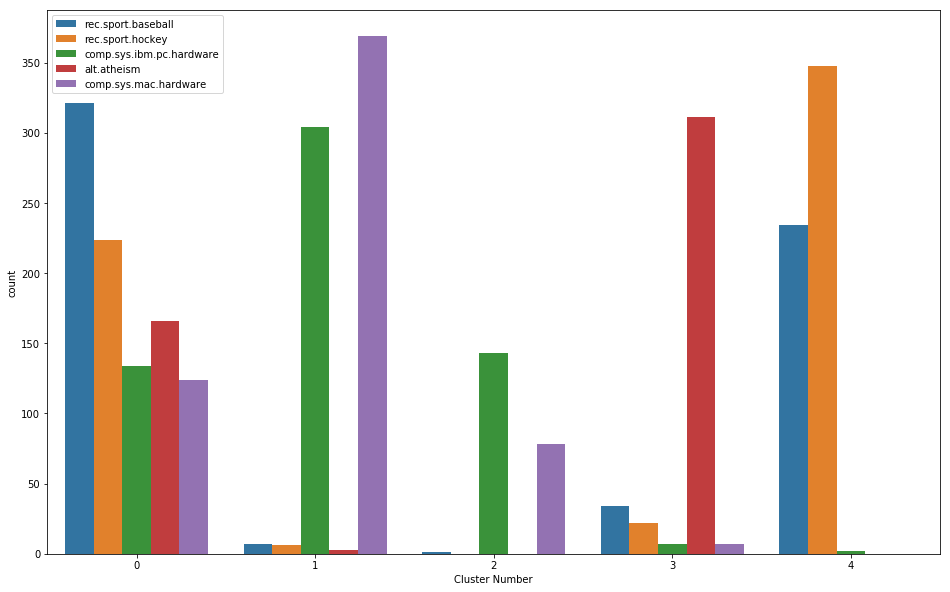

In [36]:
fig, ax=plt.subplots(figsize=(16,10))
ax=sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('Cluster Number')
plt.show()

There's only one cluster that contains 1 main type of element: cluster 3 contains mostly alt.atheism. Cluster 0 contains a decent representation of all labels. Cluster 2 hardly contains any elements, it only contain comp.sys.ibm.pc.hardware or comp.sys.mac.hardware. Cluster 1 also mainly contains comp.sys.ibm.pc.hardware or comp.sys.mac.hardware. It makes sense for those two labels to be confused. Cluster 4 is dominated by rec.sport.baseball and rec.sport.hockey, again two classes we'd expect to see some confusion between. Given the wide distribution of data, this explains the low adjusted rand score (0.25). This is a poor fit.


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better


PCA Components:  1
Inertia:  2.8225
Rand Score:  0.2102

PCA Components:  2
Inertia:  10.5843
Rand Score:  0.2681

PCA Components:  3
Inertia:  20.4472
Rand Score:  0.243

PCA Components:  5
Inertia:  49.8007
Rand Score:  0.2267

PCA Components:  10
Inertia:  117.6818
Rand Score:  0.2147

PCA Components:  20
Inertia:  230.2785
Rand Score:  0.2113

PCA Components:  50
Inertia:  488.6893
Rand Score:  0.2148

PCA Components:  100
Inertia:  801.701
Rand Score:  0.2116

PCA Components:  500
Inertia:  2131.835
Rand Score:  0.2089

PCA Components:  1000
Inertia:  2593.2522
Rand Score:  0.2131


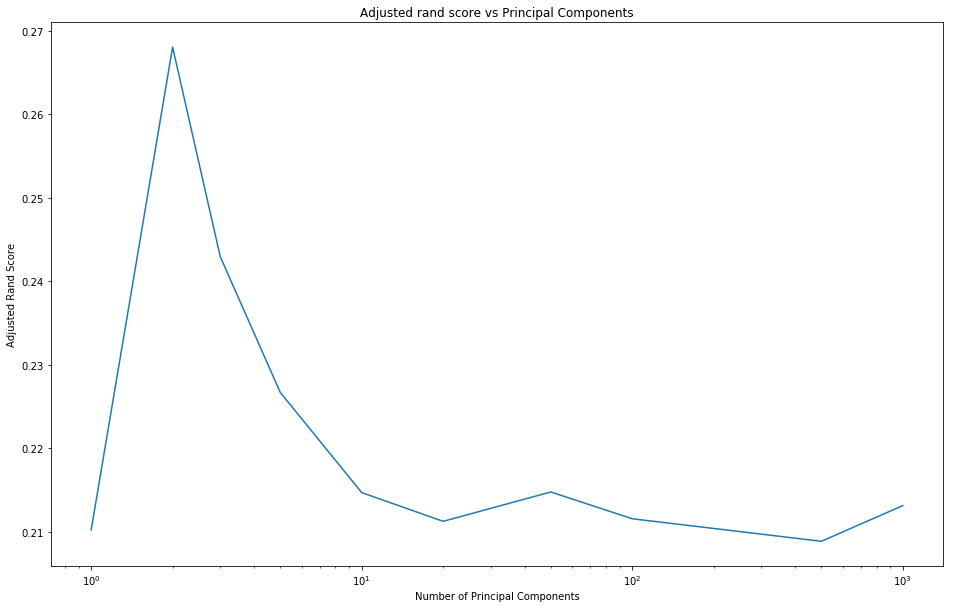

In [37]:
n_components=[1,2,3,5,10,20,50,100,500,1000]
rand_scores=np.zeros(10)
count=0
for d in n_components:
    pca=PCA(n_components=d)
    X_2d=pca.fit_transform(X)
    kmeans.fit(X_2d)
    print("\nPCA Components: ",d)
    print("Inertia: ", np.round(kmeans.inertia_, decimals=4))
    print("Rand Score: ", np.round(adjusted_rand_score(y, kmeans.labels_), decimals=4))
    rand_scores[count]=adjusted_rand_score(y, kmeans.labels_)
    count=count+1
plt.figure(figsize=(16, 10))
plt.plot(n_components, rand_scores)
plt.xlabel('Number of Principal Components')
plt.ylabel('Adjusted Rand Score')
plt.xscale("log")
plt.title("Adjusted rand score vs Principal Components")
plt.show()

1. The graph shows how the adjusted rand score is affected when the number of principal components in the PCA classifier is increased. From the results we get the highest adjusted rand score is at 2 principal components.

2. We can't use inertia because there is no way to judge what a good inertia value is. Since, inertia is not a normalized metric we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated, hence we can't use it. As the results show, the more principal components you have, the higher the inertia.

3. Dimensionality reduction can help kmeans perform better because it removes dimensions  that don't really influence the classification, thus making each cluster more compact, less spread out, and less influenced by redundant dimensions. These unnecessary dimensions can greatly increase the distances between points and change the mean, which could incorrectly classify other or future datapoints. Many of the dimensions could be multimodal and thus make sparse clusters of data in high dimensions. PCA finds the subspace which captures the largest possible variance of the data and thus may remove the effect of noisy features.

<font color='red'>TASK MARK: 8</font>
<br>
<font color='green'>COMMENT: Good choice in using a log scale - much clearer this way.<br>
Sensible rounding.<br>
Good, clear, thorough explanations.</font>

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

Adjusted rand score:  0.2678
Number of datapoints per cluster:
0    971
4    752
1    619
2    296
3    207
dtype: int64


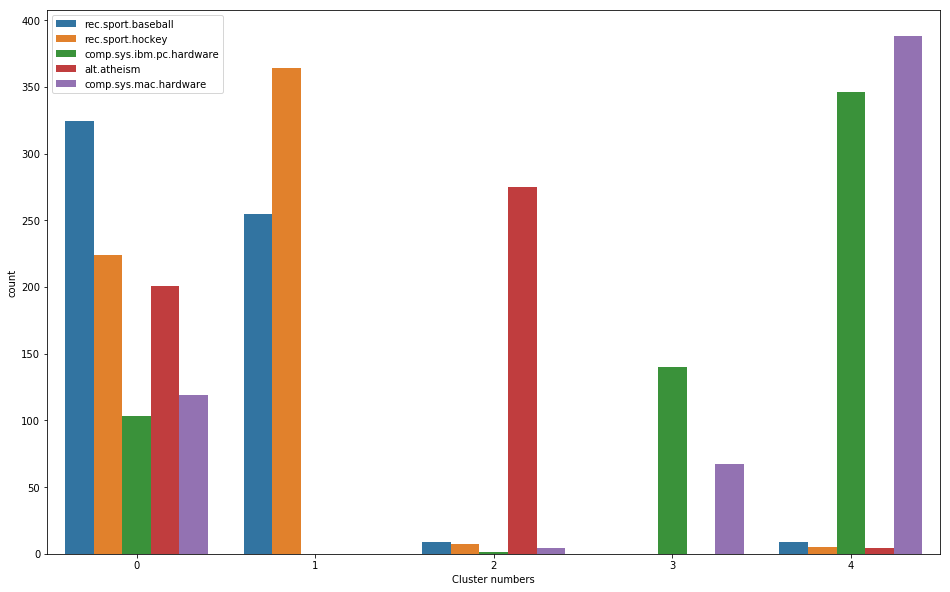

In [38]:
pca=PCA(n_components=2, random_state=27)
X_2d=pca.fit_transform(X)
kmeans_pca=KMeans(n_clusters=5, random_state=1337)  
kmeans_pca.fit(X_2d)
print("Adjusted rand score: ", np.round(adjusted_rand_score(y, kmeans_pca.labels_), decimals=4))
print("Number of datapoints per cluster:")
print(pd.value_counts(kmeans_pca.labels_))
fig, ax=plt.subplots(figsize=(16,10))
ax=sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
plt.xlabel('Cluster numbers')
plt.show()

The graph is very similar to the one in Question 1.6. The performance hasn't really improved (0.25 to 0.267). This is because we previously had 3 large clusters and 2 small ones, this hasn't really changed. The distinction between rec.sport.hockey and rec.sport.baseball hasn't really improved, the distinction between comp.sys.ibm.pc.hardware and comp.sys.mac.hardware is still bad. 

<font color='red'>TASK MARK: 5</font>
<br>
<font color='green'>COMMENT: Nice plot and sensible remarks</font>

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [39]:
cats=['rec.sport.baseball','rec.sport.hockey', 'alt.atheism','comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware']
labels_interp=np.array(cats)[kmeans_pca.labels_]

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

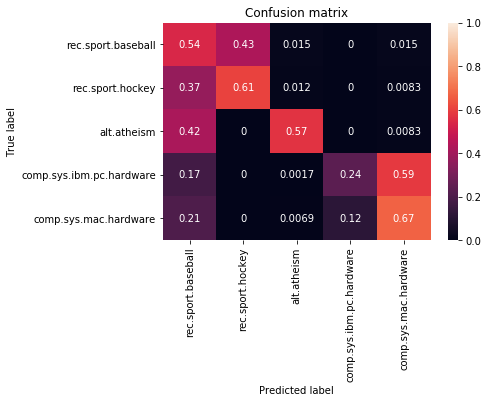

In [40]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm=confusion_matrix(y, labels_interp, labels=cats)
cm_norm=cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=cats)

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

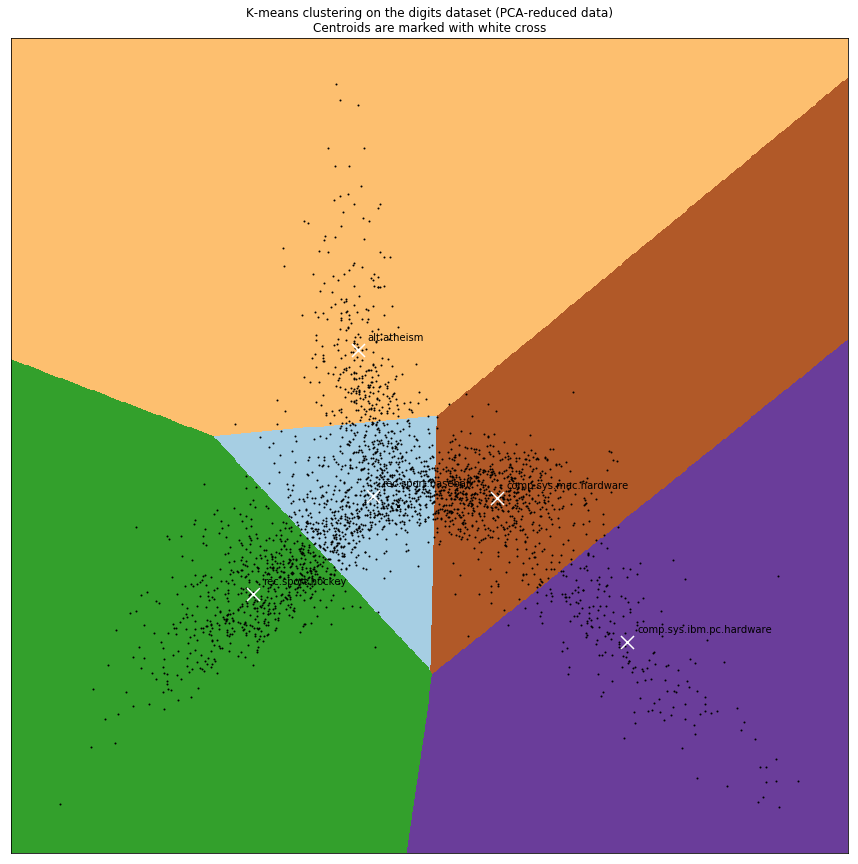

In [41]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .05, X_2d[:, 0].max() + .05
y_min, y_max = X_2d[:, 1].min() - .05, X_2d[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
fig, ax = plt.subplots(figsize=(15,15))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

# Label Centroids
for centroid, label in zip(centroids,cats): 
    plt.annotate(label, xy=centroid, xytext=(centroid[0]+.01,centroid[1]+.01))

# Plot Axes and Title
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

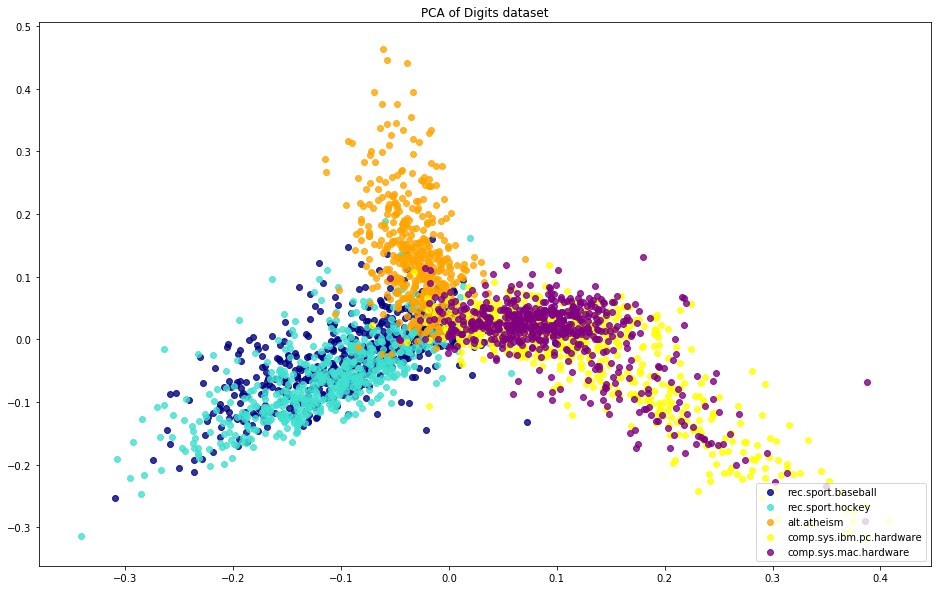

In [42]:
labels=['rec.sport.baseball','rec.sport.hockey', 'alt.atheism','comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware']
colours=['navy', 'turquoise', 'orange', 'yellow', 'purple' ]
plt.figure(figsize=(16,10))
for label, colour in zip(labels, colours):
    plt.scatter(X_2d[y==label, 0], X_2d[y==label, 1], alpha=.8, color=colour,
                label=label)
plt.legend(loc=4, shadow=False, scatterpoints=1)
plt.title('PCA of Digits dataset')
plt.show()

<font color='red'>TASK MARK: 6</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

1. The kmeans algorithm is not deterministic. Kmeans converges on a local minimum depending on your starting points. So different starting points produce different results.

2. Yes it does multiple initialisations, the sklearn implementation of kmeans uses the kmeans++ algorithm to selection optimal cluster centres by specifying a procedure to initialize the cluster centres before proceeding with the standard k-means optimization iterations. With the k-means++ initialisation, the algorithm is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution. The algorithm first chooses one centre uniformly at random from among the data points. Then for each data point compute the distance between it and the nearest centre that has already been chosen. It then chooses one new data point at random as a new centre using a weighted probability distribution where a point x is chosen with probability proportional to the squared distance between it and the nearest centre. The process is repeated until k centres have been chosen.

3. Lloyd's algorithm can also be used for initialising centres. It has two main problems. It has been shown that the worst case running time of the algorithm is super-polynomial in the input size. Also, the approximation found can be arbitrarily bad with respect to the objective function compared to the optimal clustering. Random initialisation is another option that can be used.

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: <br>
1. Yes.<br>
2. Yes.<br>
3. Yes - good.</font>

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [44]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [45]:
data=pd.DataFrame(digits['data'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [46]:
for i in range(64):
    print("dimension"+str(i)+":   Max Value:"+str(data.max(axis=0)[i])+"    Min Value:"+str(data.min(axis=0)[i]))

dimension0:   Max Value:0.0    Min Value:0.0
dimension1:   Max Value:8.0    Min Value:0.0
dimension2:   Max Value:16.0    Min Value:0.0
dimension3:   Max Value:16.0    Min Value:0.0
dimension4:   Max Value:16.0    Min Value:0.0
dimension5:   Max Value:16.0    Min Value:0.0
dimension6:   Max Value:16.0    Min Value:0.0
dimension7:   Max Value:15.0    Min Value:0.0
dimension8:   Max Value:2.0    Min Value:0.0
dimension9:   Max Value:16.0    Min Value:0.0
dimension10:   Max Value:16.0    Min Value:0.0
dimension11:   Max Value:16.0    Min Value:0.0
dimension12:   Max Value:16.0    Min Value:0.0
dimension13:   Max Value:16.0    Min Value:0.0
dimension14:   Max Value:16.0    Min Value:0.0
dimension15:   Max Value:12.0    Min Value:0.0
dimension16:   Max Value:2.0    Min Value:0.0
dimension17:   Max Value:16.0    Min Value:0.0
dimension18:   Max Value:16.0    Min Value:0.0
dimension19:   Max Value:16.0    Min Value:0.0
dimension20:   Max Value:16.0    Min Value:0.0
dimension21:   Max Value:16

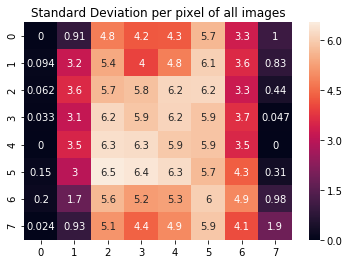

In [47]:
stds=data.describe().loc['std']
std_new= stds.values.reshape((8,8))
fig, ax = plt.subplots()
sns.heatmap(std_new, annot=True, ax=ax)
ax.set_title('Standard Deviation per pixel of all images')
plt.show()

Standard Deviation heatmaps for all digits:


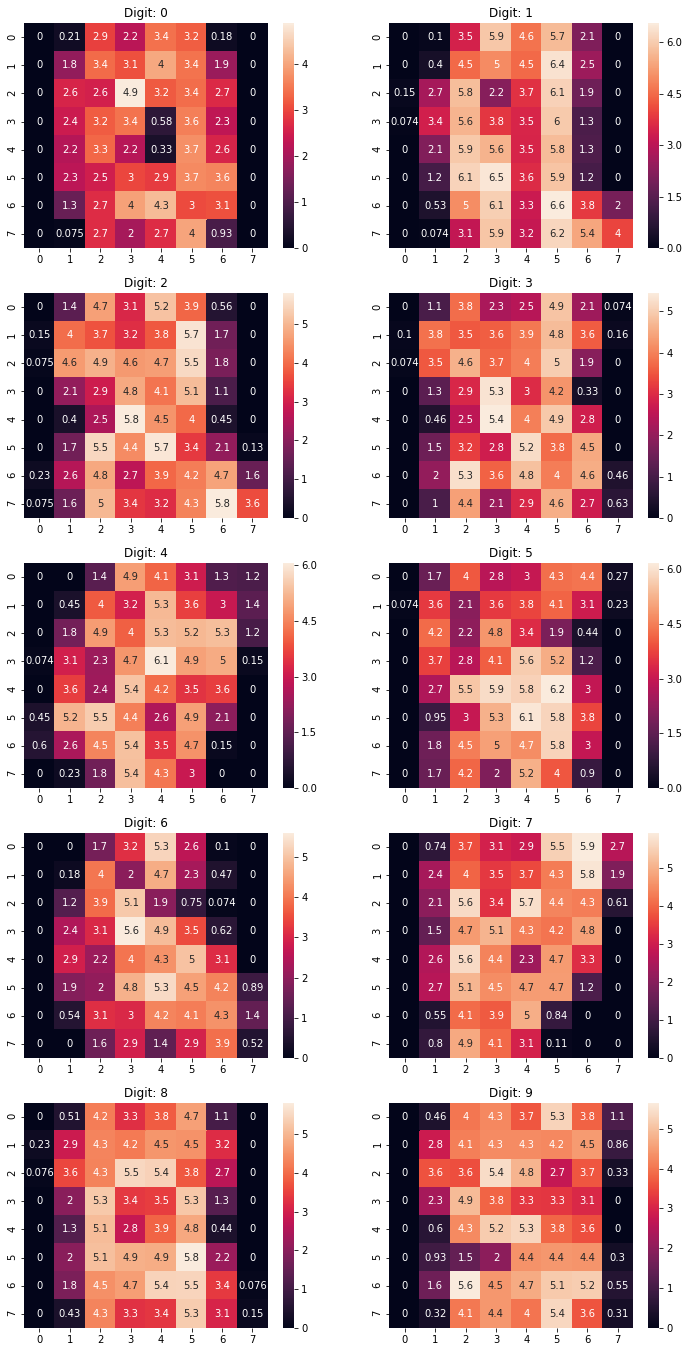

In [48]:
print("Standard Deviation heatmaps for all digits:")
digit_stds= data.groupby(digits.target).std().as_matrix()
x=[np.zeros([8,8]) for _ in range(10)]
numbers=np.dstack(x)
numbers=np.rollaxis(numbers,-1)
for i in range(10):
    numbers[i]=digit_stds[i].reshape((8,8))
fig,ax_main=plt.subplots(5, 2, figsize=(12,24))
for ax,i in zip(ax_main.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True)
    ax.set_title("Digit: "+str(i))

Heatmaps for all digit images:


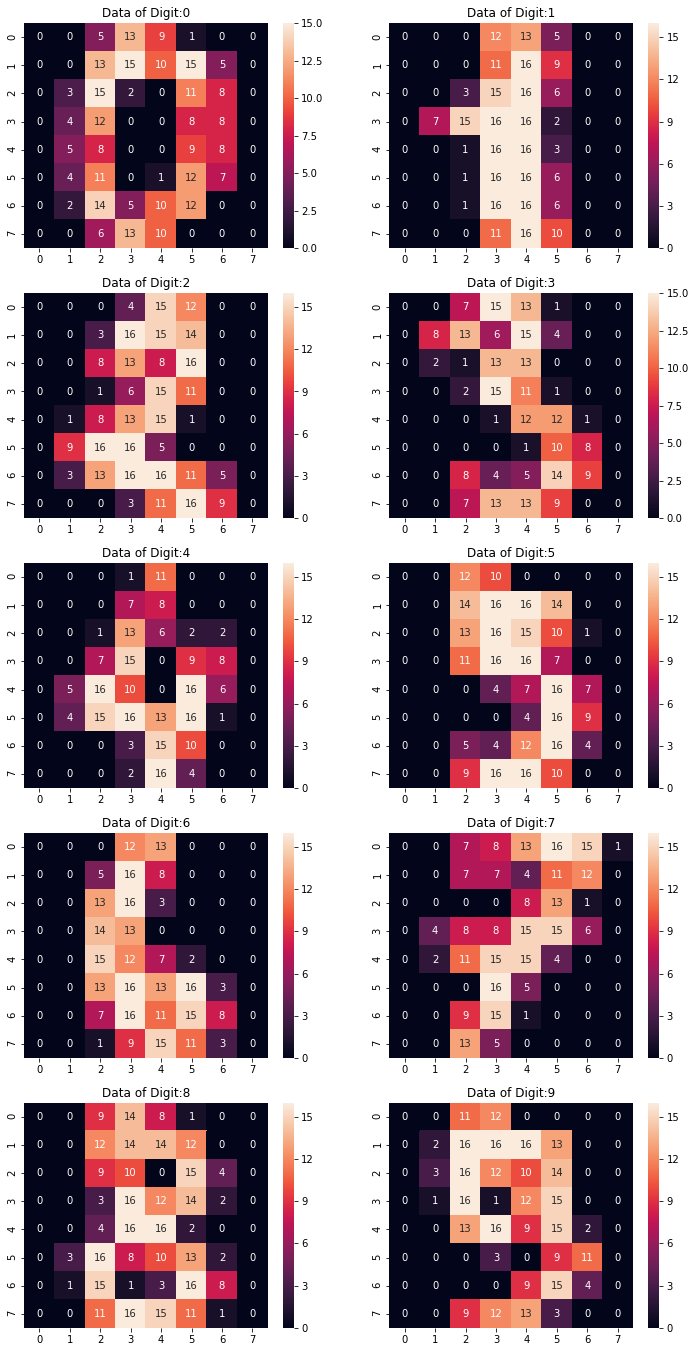

In [49]:
print("Heatmaps for all digit images:")
x=[np.zeros([8,8]) for _ in range(10)]
numbers=np.dstack(x)
numbers=np.rollaxis(numbers,-1)
for i in range(10):
    numbers[i]=data.iloc[i].values.reshape((8,8))
fig,ax_main = plt.subplots(5, 2, figsize=(12,24))
for ax,i in zip(ax_main.flat, range(10)):
    sns.heatmap(numbers[i], ax=ax, annot=True)
    ax.set_title("Data of Digit:"+str(i))

Not all of the dimensions are going to be useful. As the heatmaps show, the edges of the images are basically useless as they have zero count. This makes sense because on almost all of the digit images, the edges will be white space with no markings.

<font color='red'>TASK MARK: 8</font>
<br>
<font color='green'>COMMENT: <br>
*Things to note*~ <br>
Nice annotation of heatmap <br>
Bonus mark for the individual-digit-sd-maps! <br>
Nice looking plots! <br>
Nicely structured code <br>
I can think of much more compact, readable ways of displaying your mins and maxes <br>
*Written answer*~ <br>
Yes - sensible</font>

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

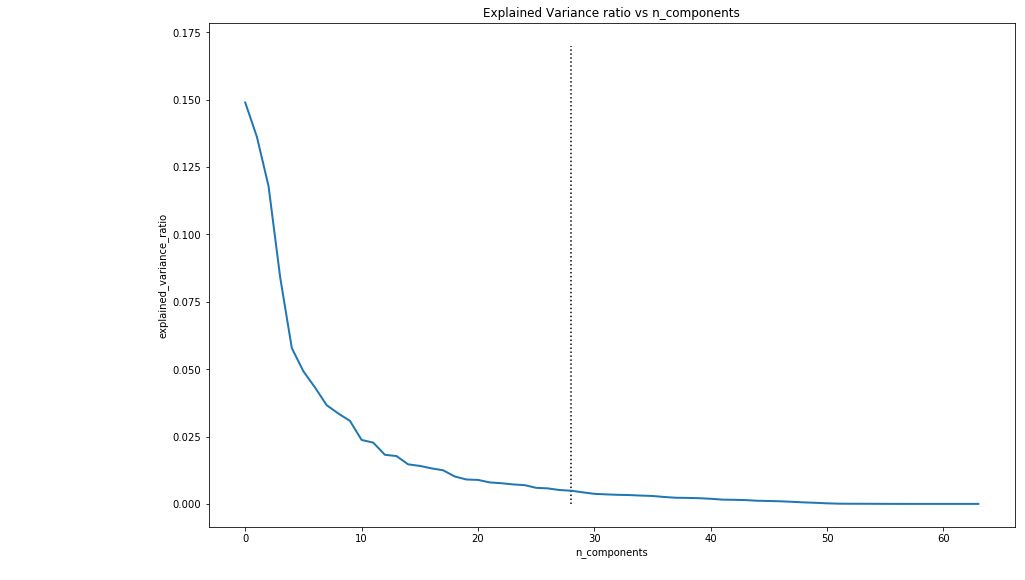

In [50]:
n_components=digits.data.shape[1]
pca=PCA(n_components=digits.data.shape[1])
digits=datasets.load_digits()
X_digits=digits.data
y_digits=digits.target
pca.fit(digits.data)
tot_variance=sum(pca.explained_variance_)
cumulative_explained_variance=0.0
for i in range(len(pca.explained_variance_)):
    cumulative_explained_variance=cumulative_explained_variance+pca.explained_variance_[i]
    if cumulative_explained_variance/tot_variance>.95:
        variance_point=i;
        break;
pca.fit(X_digits)
plt.figure(1, figsize=(16,10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.vlines(variance_point, 0, 0.17, linestyle="dotted")
plt.annotate("29 Eigenvectors", xy=(29,100))
plt.axis('tight')
plt.title("Explained Variance ratio vs n_components")
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.show()

The majority of the data can be explained with relatively few eigenvectors or principal components, as shown by the graph. We only need 29 eigen vectors (since the graph is indexed from 0) to capture 95% of the variance in the data.

<font color='red'>TASK MARK: 6</font>
<br>
<font color='green'>COMMENT: <br>
Vertical line unlabelled.<br>
*Written answer*~ <br>
Yes. Note that we observed in q2.1 that ~16 of the 64 dimensions contain little or no information. We might therefore expect that with ~48 principal components, we might explain almost all of the variance.</font>

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

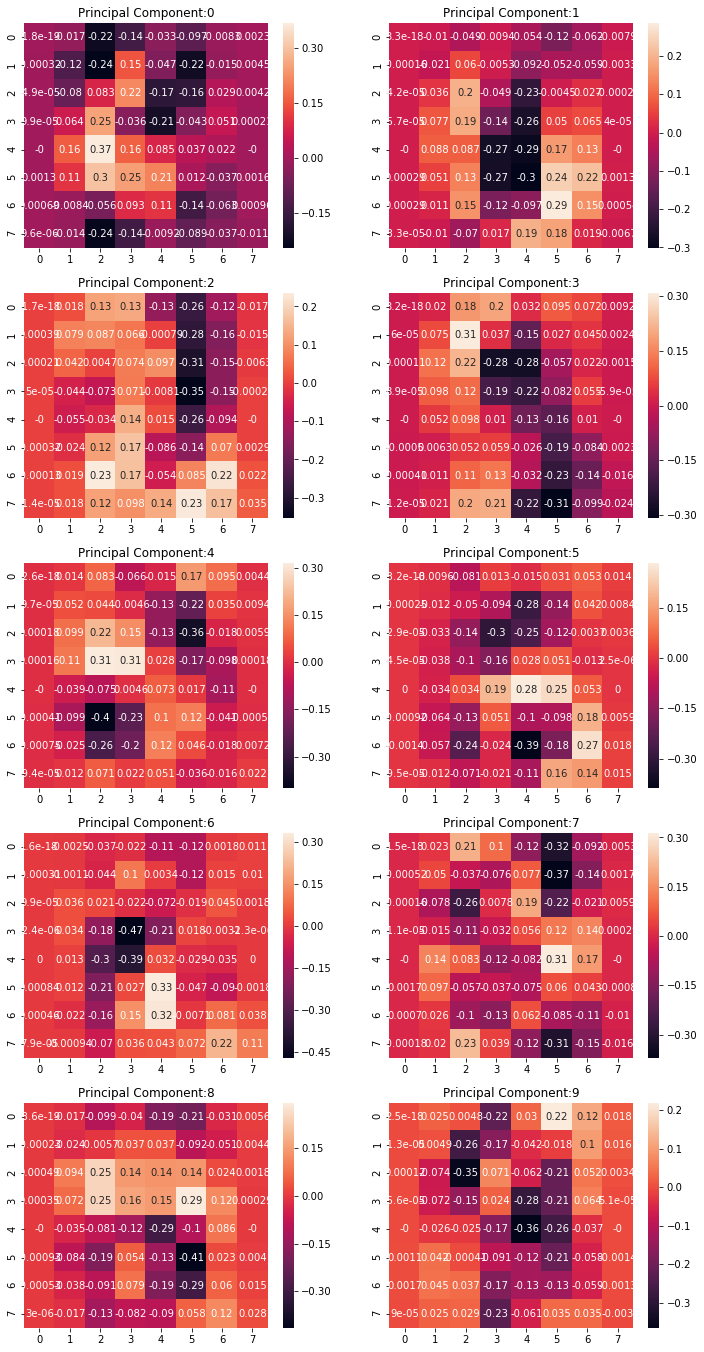

In [51]:
x=[np.zeros([8,8]) for _ in range(10)]
new_pc=np.dstack(x)
new_pc=np.rollaxis(new_pc,-1)
for i in range(10):
    new_pc[i]=pca.components_[i].reshape((8,8))
fig,ax_main=plt.subplots(5, 2, figsize=(12,24))
for ax,i in zip(ax_main.flat, range(10)):
    sns.heatmap(new_pc[i], ax=ax, annot=True)
    ax.set_title("Principal Component:"+str(i))

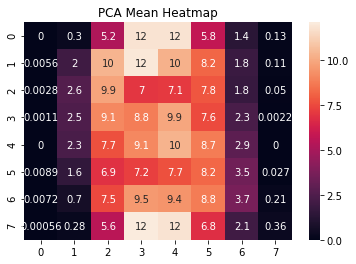

In [52]:
mean_pca=pca.mean_.reshape((8,8))
ax=sns.heatmap(mean_pca, annot=True)
ax.set_title('PCA Mean Heatmap')
plt.show()

<font color='red'>TASK MARK: 8</font>
<br>
<font color='green'>COMMENT: <br>
Nice layout and nice annotation of heatmap  </font>

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

/afs/inf.ed.ac.uk/user/s15/s1552184/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


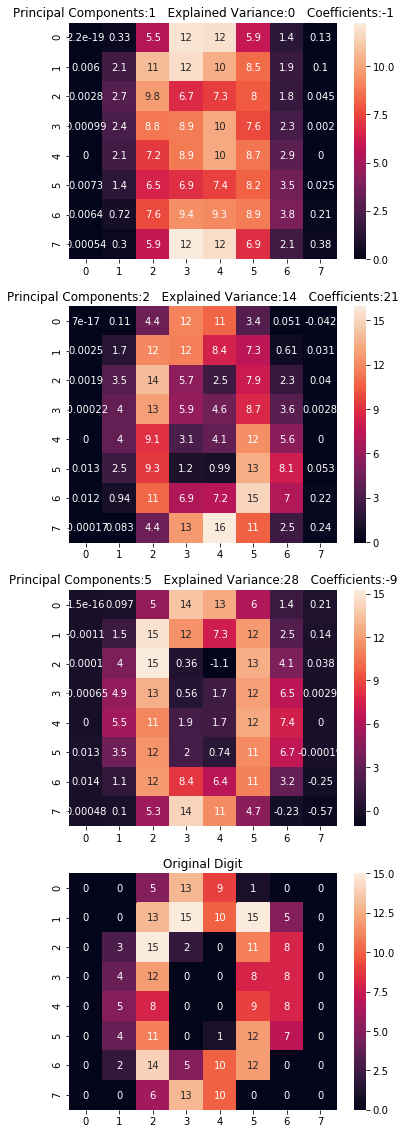

In [53]:
coeffs=pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
x=[np.zeros([8,8]) for _ in range(10)]
numbers=np.dstack(x)
numbers=np.rollaxis(numbers,-1)
idxlist=[1,2,5]
for i in idxlist:
    new_digit=pca.mean_
    for j in range(i):
        new_digit=new_digit+pca.components_[j]*coeffs[j]
    numbers[i]=new_digit.reshape((8,8))
numbers[3]=data.iloc[0].reshape((8,8))
fig,ax_main=plt.subplots(4, 1, figsize=(6,20))
for ax,i in zip(ax_main.flat, range(4)):
    if not(i==3):
        variancepercent=sum(pca.explained_variance_[0:i])/sum(pca.explained_variance_)
        sns.heatmap(numbers[idxlist[i]], ax=ax, annot=True)
        ax.set_title("Principal Components:"+str(idxlist[i])+"   Explained Variance:"+str(int(100*variancepercent))+"   Coefficients:"+(str(int(coeffs[i]))))
sns.heatmap(numbers[3], ax=ax, annot=True)
ax.set_title("Original Digit")    

The data seems to be mostly realistic in the sense the values are positive for the original digit and the images with 1 and 2 principal components. However, there are some negative values for the image with 5 principal components. This is unrealistic since the domain of the values is restricted to positive values.
Otherwise as expected the images look more like a real zero when the Principal Components are increased. It is difficult to see with 1 Principal component, but gets clearer with 2 and 5.

<font color='red'>TASK MARK: 10</font>
<br>
<font color='green'>COMMENT: Output sensible.<br>
Nice annotation of heatmap <br>
Nice layout<br> 
*Written answer*~ <br>
Yes - precisely.
</font>

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

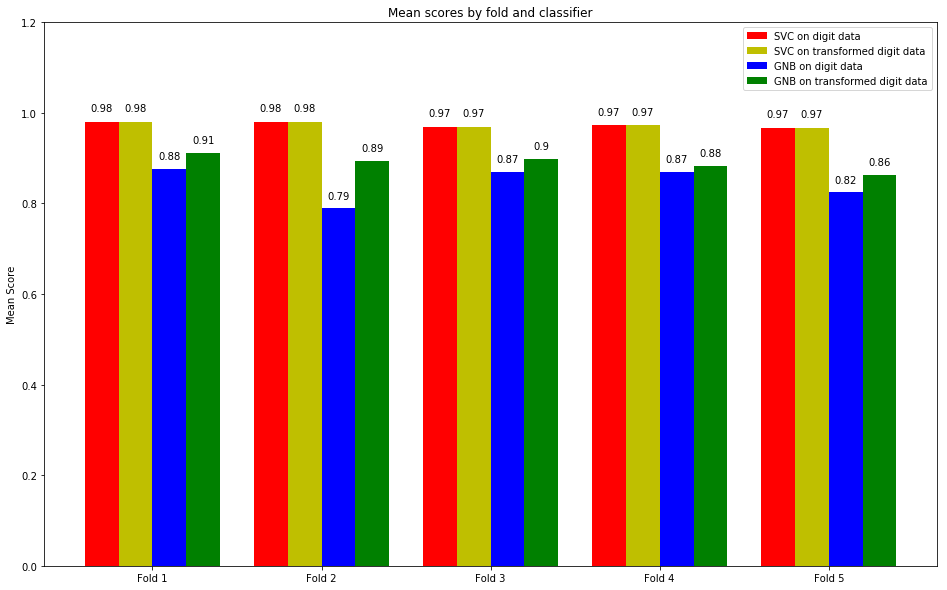

In [54]:
digit_data=digits.data
digit_data_trans=pca.fit_transform(digits.data)
svc_original=SVC(kernel="linear", shrinking=False, random_state=1337)
svc_pca=SVC(kernel="linear", shrinking=False, random_state=1337)
gnb_original=GaussianNB()
gnb_pca=GaussianNB()
classifiers=[svc_original, svc_pca, gnb_original, gnb_pca]
classifier_names=['Support Vector Classifier on digit data', 'Support Vector Classifier on transformed digit data', 'Gaussian Naive Bayes on digit data', 'Gaussian Naive Bayes on transformed digit data']
data_list=[digit_data, digit_data_trans , digit_data, digit_data_trans]
mean=[[],[],[],[]]
kfolds_final=KFold(n_splits=5, shuffle=True, random_state=1337)
count=0
for index, value, classifier in zip(range(4), data_list, classifiers):
    for train_index, test_index in kfolds_final.split(value):
        X_train, X_test=value[train_index], value[test_index]
        y_train, y_test=digits.target[train_index], digits.target[test_index]
        classifier.fit(X_train, y_train)
        mean[count].append(classifier.score(X_test, y_test))
    count=count+1

N = 5
svc_og_mean=mean[0]
svc_pca_mean=mean[1]
gnb_og_mean=mean[2]
gnb_pca_mean=mean[3]
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(16,10))
rects1 = ax.bar(ind, svc_og_mean, width, color='r')
rects2 = ax.bar(ind+width, svc_pca_mean, width, color='y')
rects3 = ax.bar(ind+2*width, gnb_og_mean, width, color='b')
rects4 = ax.bar(ind+3*width, gnb_pca_mean, width, color='g')
# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Score')
ax.set_title('Mean scores by fold and classifier')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('SVC on digit data', 'SVC on transformed digit data', 'GNB on digit data', 'GNB on transformed digit data'))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + (rect.get_width())/2., 1.02*height,
                np.round(height, decimals=2),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.ylim(ymax=1.2)
plt.show()

The Gaussian Naive Bayes classifier improved on the transformed data while the Support Vector Classifer did not. With PCA the dimensions are less correlated and more "independent". The Gaussian Naive Bayes classifier performs better because it already assumes the dimensions are independent. Naive Bayes classifier is Generative while SVC is Discriminative.
PCA of full dimensionality effectively translates the data to the other axis which contains the principal components.
PCA of full dimensionality does not lose any information since we are not reducing dimensions.

<font color='red'>TASK MARK: 9</font>
<br>
<font color='green'>COMMENT: Nice plot; however, your explanation is not terribly clear. It would have helped if you had explicitly stated that the points in PCA do not change position in relation to each other, but rather rotates the space in relation to the points.</font>